In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def read_data(filename):
    with open(filename, 'r',encoding= 'utf-8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
    return data

In [3]:
import glob

path = '/content/hikim/text/*_page200_clean.txt'
files = glob.glob(path)

In [17]:
files


['/content/hikim/text/7_page200_clean.txt',
 '/content/hikim/text/9_page200_clean.txt',
 '/content/hikim/text/6_page200_clean.txt',
 '/content/hikim/text/5_page200_clean.txt',
 '/content/hikim/text/2_page200_clean.txt',
 '/content/hikim/text/3_page200_clean.txt',
 '/content/hikim/text/8_page200_clean.txt',
 '/content/hikim/text/1_page200_clean.txt',
 '/content/hikim/text/4_page200_clean.txt']

In [18]:
#for i in range(9):
#    globals()['route{}'.format(i)] = files[i]
    
#route0~49 : category1
#route 50~99 : category2
#route 100~149 : category3


In [19]:
i = 0
for t in files:
    globals()['read{}'.format(i)] = read_data(t)[0]
    i+=1



In [20]:
#for i in range(150):
#    print(i, i // 50 + 1)
#    globals()['read{}'.format(i)].extend(str(i // 50 + 1))

In [21]:
#for j in range(0,9):
#    print('read{j}'.format(j=j))

In [22]:
total7 = []
sttest = str(read0)
words = sttest.split('입력')

for i in words:
    ii = [i]
    ii.extend('7')
    total7.append(ii)


In [23]:
total9 = []
sttest = str(read1)
words = sttest.split('입력')

for i in words:
    ii = [i]
    ii.extend('9')
    total9.append(ii)

In [24]:
total6 = []
sttest = str(read2)
words = sttest.split('입력')

for i in words:
    ii = [i]
    ii.extend('6')
    total6.append(ii)

In [25]:
total5 = []
sttest = str(read3)
words = sttest.split('입력')

for i in words:
    ii = [i]
    ii.extend('5')
    total5.append(ii)

In [26]:
total2 = []
sttest = str(read4)
words = sttest.split('입력')

for i in words:
    ii = [i]
    ii.extend('2')
    total2.append(ii)

In [27]:
total3 = []
sttest = str(read5)
words = sttest.split('입력')

for i in words:
    ii = [i]
    ii.extend('3')
    total3.append(ii)

In [28]:
total8 = []
sttest = str(read6)
words = sttest.split('입력')

for i in words:
    ii = [i]
    ii.extend('8')
    total8.append(ii)

In [29]:
total1 = []
sttest = str(read7)
words = sttest.split('입력')

for i in words:
    ii = [i]
    ii.extend('1')
    total1.append(ii)

In [30]:
total4 = []
sttest = str(read8)
words = sttest.split('입력 ')

for i in words:
    ii = [i]
    ii.extend('4')
    total4.append(ii)

In [31]:
len(total1)
#현재 total1~9

2023

In [32]:
data_merge = []

for i in range(1,10):
    data_merge.extend(globals()['total{}'.format(i)])


In [33]:
#category1 = total1
print(len(data_merge[0]))

2


In [34]:
#전체 카테고리 9개
print(len(data_merge))

17942


In [35]:
X = [row for row in data_merge if len(row[0]) > 10]


In [36]:
print(len(X[0]))

2


In [37]:
print(len(X))

17933


pandas dataframe안쓰는 방법고안

In [38]:
import random
data_list = data_merge
random.shuffle(data_list)
cut_point = int(len(data_list) * 0.7)

In [39]:
train = data_list[ : cut_point]
test = data_list[cut_point : ]

In [40]:
len(train)

12559

In [41]:
len(test)

5383

In [42]:
#train_data = X[:105]
#test_data=X[105:]

2.KoNLPy로 품사tagging

In [4]:
from konlpy.tag import Okt
pos_tagger = Okt()
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [5]:
import pickle

In [45]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
test_docs = [(tokenize(row[0]), row[1]) for row in test]

tokenize save

In [46]:
import os
os.getcwd()


'/content/hikim'

In [47]:
# # save txt
# with open("/content/hikim/traintestdata/train_docs_save.txt", 'wb')as wt:
#      pickle.dump(train_docs, wt)
    
# with open("/content/hikim/traintestdata/test_docs_save.txt", 'wb')as wt:
#     pickle.dump(test_docs, wt)

tokenize load

In [6]:
# load
with open('/content/hikim/traintestdata/train_docs_save.txt', 'rb') as rd:
    train_docs1 = pickle.load(rd)

with open('/content/hikim/traintestdata/test_docs_save.txt', 'rb') as rd:
    test_docs1 = pickle.load(rd)


In [34]:
print(len(train_docs1),len(train_docs1[0]))

12559 2


In [71]:
#!pip install nltk

    100% |████████████████████████████████| 1.4MB 7.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /root/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk


In [7]:
import nltk

tokens = [t for d in train_docs1 for t in d[0]]

text = nltk.Text(tokens, name='NMSC')

In [8]:
#전체 토큰의 갯수
len(text.tokens)

5717932

명사 EDA

In [9]:
all_nouns = np.array([w for w in text.tokens if w.split("/")[1] == "Noun"])

In [10]:
words, counts = np.unique(all_nouns, return_counts=True)

In [11]:
import pandas as pd

In [12]:
wordcount = pd.DataFrame(data = {"words": words, "counts": counts})

In [13]:
min_freq_5 = wordcount.loc[wordcount["counts"] >= 5, :]
min_freq_5.reset_index(inplace=True, drop=True)

In [14]:
min_freq_5

,words,counts
0,가/Noun,21
1,가가/Noun,110
2,가감/Noun,21
3,가거도/Noun,5
4,가게/Noun,305
5,가격/Noun,1100
6,가격표/Noun,6
7,가결/Noun,51
8,가계/Noun,62
9,가계부채/Noun,22


In [15]:
sort_min_freq_5 = min_freq_5.sort_values(by = 'counts', ascending = False)
#plt.bar(min_freq_5['words'], min_freq_5['counts'])
sort_min_freq_5.reset_index(inplace = True, drop = True)
top30 = sort_min_freq_5[8:19]

In [16]:
import matplotlib.pyplot as plt

In [17]:
import matplotlib.font_manager as fm

In [19]:
from matplotlib import font_manager, rc

# font_manager.get_fontconfig_fonts()
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [68]:
# font_location = '/usr/share/fonts/truetype/Gulim/gulim.ttc'
# font_name = fm.FontProperties(fname = font_location).get_name()
# # matplotlib.rc('font',family = font_name)

In [20]:
font_list

['/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-BoldOblique.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-Oblique.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetyp

In [71]:
matplotlib.matplotlib_fname()

'/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

In [21]:
print('사용가능한 TTF 폰트 개수:', len(font_list))
font_list[:10] # 목록에서 처음 10 개만 보기

사용가능한 TTF 폰트 개수: 39


['/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-BoldOblique.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Bold.ttf']

In [24]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothicCoding',
  '/usr/share/fonts/truetype/nanum/NanumGothic_Coding_Bold.ttf'),
 ('NanumGothicCoding',
  '/usr/share/fonts/truetype/nanum/NanumGothic_Coding.ttf')]

In [25]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic_Coding_Bold.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

In [26]:
fontprop

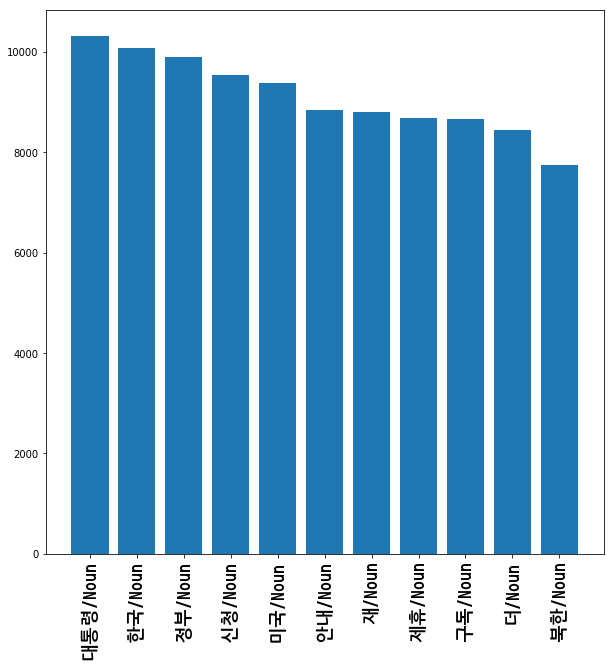

In [32]:
plt.figure(figsize=(10,10))
plt.bar(top30['words'], top30['counts'])
# plt.xlabel(top30['words'], fontproperties=fontprop)
plt.xticks(top30['words'], rotation=90, fontproperties=fontprop)
plt.show()

In [140]:
words[counts >= 5]

array(['가/Noun', '가가/Noun', '가감/Noun', ..., '힘껏/Noun', '힙/Noun',
       '힙합/Noun'], dtype='<U17')

In [37]:
len(tokens)


5724506

In [38]:
#유니크한 token의 갯수
print(len(set(text.tokens)))

82555


In [93]:

print(text.vocab().most_common(10))

[('하다/Verb', 194939), ('을/Josa', 150473), ('이/Josa', 100774), ('의/Josa', 92893), ('에/Josa', 91929), ('를/Josa', 84397), ('은/Josa', 73998), ('는/Josa', 62123), ('가/Josa', 60206), ('있다/Adjective', 58688)]


In [92]:
print(len(text.vocab()))

82555


In [ ]:
#pilot test
#selected_words = [f[0] for f in text.vocab().most_common(3000)]
#len(selected_words)

In [65]:
type(selected_words)

list

In [61]:
selected_words = [f[0] for f in text.vocab().most_common(2000)]
selected_words[:10]

['하다/Verb',
 '을/Josa',
 '이/Josa',
 '의/Josa',
 '에/Josa',
 '를/Josa',
 '은/Josa',
 '는/Josa',
 '가/Josa',
 '있다/Adjective']

In [88]:
def term_exists(doc):
    return {'exists({})'.format(word): (word in set(doc)) for word in selected_words}

In [89]:
len(train_docs1)

12567

In [60]:
train_docs1[0]

SyntaxError: invalid syntax (<ipython-input-60-6eb3a405cc46>, line 1)

In [90]:
#train_docs = train_docs1[40:]
#test_docs = test_docs1[:40]
train_xy = [(term_exists(d), c) for d, c in train_docs1]
test_xy = [(term_exists(d), c) for d, c in test_docs1]

In [94]:
len(train_xy)
len(test_xy)

5386

In [95]:
example = train_xy[0]

In [106]:
list(example[0].keys())[:10]

['exists(하다/Verb)',
 'exists(을/Josa)',
 'exists(이/Josa)',
 'exists(의/Josa)',
 'exists(에/Josa)',
 'exists(를/Josa)',
 'exists(은/Josa)',
 'exists(는/Josa)',
 'exists(가/Josa)',
 'exists(있다/Adjective)']

In [105]:
list(example[0].values())[:10]

[True, True, True, True, True, True, True, True, True, True]

Naive Bayes를 통한 분류

In [91]:
#분류기를 학습시킨후, 정확도 check
classifier = nltk.NaiveBayesClassifier.train(train_xy)

print(nltk.classify.accuracy(classifier, test_xy))

0.7803564797623468


In [104]:

classifier.show_most_informative_features(10)

Most Informative Features
         exists(갚다/Verb) = True                1 : 2      =    937.3 : 1.0
        exists(핫이슈/Noun) = True                1 : 2      =    937.3 : 1.0
         exists(노숙/Noun) = True                1 : 4      =    923.6 : 1.0
       exists(당첨번호/Noun) = True                1 : 4      =    923.6 : 1.0
       exists(줄기세포/Noun) = True                1 : 4      =    923.6 : 1.0
      exists(747/Number) = True                1 : 4      =    923.6 : 1.0
        exists(불면증/Noun) = True                1 : 4      =    923.6 : 1.0
        exists(관절염/Noun) = True                1 : 6      =    921.0 : 1.0
         exists(로또/Noun) = True                1 : 6      =    921.0 : 1.0
         exists(비즈/Noun) = True                1 : 6      =    921.0 : 1.0


데이터 내의 명사들만 모아서 분류해보기

In [94]:
select_noun = [f for f in text.vocab() if 'Noun' in f]
len(select_noun)

58527

In [95]:
select_noun[:10]

['극단/Noun',
 '선택/Noun',
 '이/Noun',
 '과정/Noun',
 '소셜미디어/Noun',
 '업로드/Noun',
 '인터넷/Noun',
 '방송/Noun',
 '진행자/Noun',
 '로어/Noun']

In [97]:
type(select_noun)

list

In [100]:
from collections import Counter
data = Counter(select_noun)

In [115]:
select_noun_arr = np.array(select_noun)

In [118]:
_, counts = np.unique(select_noun_arr, return_counts=True)

In [120]:
sum(counts)

58527

In [103]:
data.most_common(10)

[('극단/Noun', 1),
 ('선택/Noun', 1),
 ('이/Noun', 1),
 ('과정/Noun', 1),
 ('소셜미디어/Noun', 1),
 ('업로드/Noun', 1),
 ('인터넷/Noun', 1),
 ('방송/Noun', 1),
 ('진행자/Noun', 1),
 ('로어/Noun', 1)]

In [123]:
def term_exists_noun(doc):
    return {'exists({})'.format(word): (word in set(doc))
           for word in select_3000_noun}

In [124]:
train_xy = [(term_exists_noun(d), c) for d, c in train_docs1]
test_xy = [(term_exists_noun(d), c) for d, c in test_docs1]

In [125]:
example_noun = train_xy[0]

In [126]:
list(example_noun[0].keys())[:10]

['exists(하다/Verb)',
 'exists(을/Josa)',
 'exists(이/Josa)',
 'exists(의/Josa)',
 'exists(에/Josa)',
 'exists(를/Josa)',
 'exists(은/Josa)',
 'exists(는/Josa)',
 'exists(가/Josa)',
 'exists(있다/Adjective)']